<a href="https://colab.research.google.com/github/CEOApplepine/automated-procurement-insights/blob/main/Procurement_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procurement Data:


,PO_ID,Supplier,Category,Amount,Order_Date,Contract_ID
0,1001,ABC Ltd,Maintenance,5000,2025-01-15,C001
1,1002,XYZ Inc,Logistics,3000,2025-01-20,C002
2,1003,LMN Co,Maintenance,4500,2025-01-22,C003
3,1004,DEF Ltd,Logistics,2500,2025-01-25,C004


Maintenance Data:


,Asset_ID,Work_Order_ID,Maintenance_Cost,Date,PO_ID
0,A01,WO001,2000,2025-01-20,1001
1,A02,WO002,1500,2025-01-23,1003
2,A03,WO003,1000,2025-01-26,1002
3,A04,WO004,1200,2025-01-28,1004


,PO_ID,Supplier,Category,Amount,Order_Date,Contract_ID,Asset_ID,Work_Order_ID,Maintenance_Cost,Date
0,1001,ABC Ltd,Maintenance,5000,2025-01-15,C001,A01,WO001,2000,2025-01-20
1,1002,XYZ Inc,Logistics,3000,2025-01-20,C002,A03,WO003,1000,2025-01-26
2,1003,LMN Co,Maintenance,4500,2025-01-22,C003,A02,WO002,1500,2025-01-23
3,1004,DEF Ltd,Logistics,2500,2025-01-25,C004,A04,WO004,1200,2025-01-28


Total Procurement Spend: $15,000.00
Total Maintenance Spend: $5,700.00
Total Combined Spend: $20,700.00
Supplier Spend:


,Supplier,Amount
0,ABC Ltd,5000
1,DEF Ltd,2500
2,LMN Co,4500
3,XYZ Inc,3000


Category Spend:


,Category,Amount
0,Logistics,5500
1,Maintenance,9500


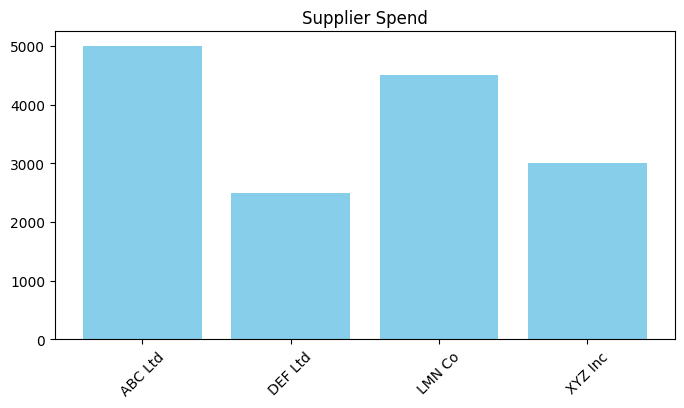

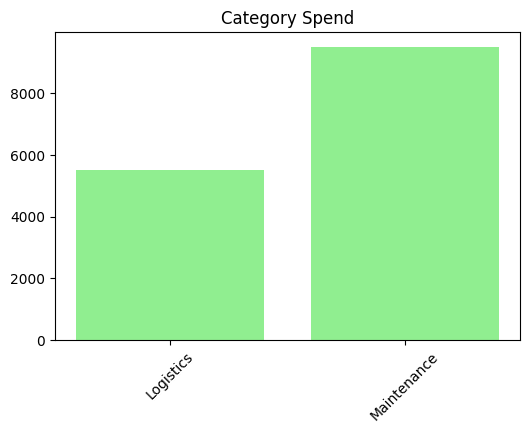

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Step 2: Load data from GitHub
username = "CEOApplepine"  # replace this
repo = "automated-procurement-insights"

procurement_url = f"https://raw.githubusercontent.com/CEOApplepine/automated-procurement-insights/refs/heads/main/Data/oracle_procurement.csv"
maintenance_url = f"https://raw.githubusercontent.com/CEOApplepine/automated-procurement-insights/refs/heads/main/Data/maximo_maintenance.csv"

procurement = pd.read_csv(procurement_url)
maintenance = pd.read_csv(maintenance_url)

print("Procurement Data:")
display(procurement.head())
print("Maintenance Data:")
display(maintenance.head())

# Step 3: Merge datasets
merged = pd.merge(procurement, maintenance, on='PO_ID', how='left')
merged['Maintenance_Cost'] = merged['Maintenance_Cost'].fillna(0)
display(merged.head())

# Step 4: Analytics
total_procurement = merged['Amount'].sum()
total_maintenance = merged['Maintenance_Cost'].sum()
total_spend = total_procurement + total_maintenance

print(f"Total Procurement Spend: ${total_procurement:,.2f}")
print(f"Total Maintenance Spend: ${total_maintenance:,.2f}")
print(f"Total Combined Spend: ${total_spend:,.2f}")

# Step 5: Supplier and Category Spend
supplier_spend = merged.groupby('Supplier')['Amount'].sum().reset_index()
category_spend = merged.groupby('Category')['Amount'].sum().reset_index()

print("Supplier Spend:")
display(supplier_spend)
print("Category Spend:")
display(category_spend)

# Step 6: Visualizations
plt.figure(figsize=(8,4))
plt.bar(supplier_spend['Supplier'], supplier_spend['Amount'], color='skyblue')
plt.title("Supplier Spend")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(category_spend['Category'], category_spend['Amount'], color='lightgreen')
plt.title("Category Spend")
plt.xticks(rotation=45)
plt.show()